In [13]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
import pandas.util.testing as tm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Leitura do CSV e setando como Time
df = pd.read_csv('FT02_18_19.csv',delimiter=';', parse_dates=True)
df['Time'] = pd.to_datetime(df.Time)
df = df[df['Time'].notna()]
df = df.set_index('Time')
df = df.resample("D").last()

In [15]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()



In [16]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,1))
    model_fit = model.fit(trend='c', disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=115.238161, expected=124.160000
predicted=118.143989, expected=112.830000
predicted=118.159537, expected=107.280000
predicted=114.471675, expected=110.700000
predicted=114.723395, expected=126.510000
predicted=119.332913, expected=131.130000
predicted=122.752967, expected=127.940000
predicted=122.318695, expected=112.300000
predicted=117.854598, expected=119.890000
predicted=117.780439, expected=129.610000
predicted=121.899255, expected=118.980000
predicted=120.379671, expected=124.100000
predicted=120.035237, expected=113.400000
predicted=118.379996, expected=124.130000
predicted=119.490583, expected=120.600000
predicted=120.458585, expected=126.240000
predicted=121.150070, expected=111.370000
predicted=118.296071, expected=126.410000
predicted=119.884227, expected=118.720000
predicted=120.557651, expected=117.100000
predicted=118.585683, expected=111.820000
predicted=117.209682, expected=111.450000
predicted=116.289145, expected=112.440000
predicted=116.493182, expected=108

RMSE é: 6.976
MSE é: 48.670
MAPE é: 0.051


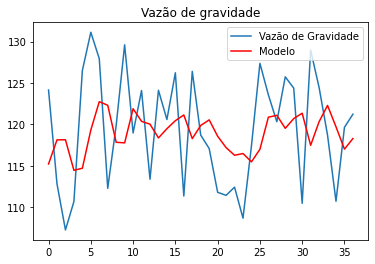

In [17]:
# evaluate forecasts
RMSE = sqrt(mean_squared_error(test, predictions))
MSE = mean_squared_error(test, predictions)
MAPE = mean_absolute_percentage_error(test, predictions)
print("RMSE é: %.3f" %RMSE)
print("MSE é: %.3f" %MSE)
print("MAPE é: %.3f" %MAPE)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Vazão de gravidade')
plt.legend(['Vazão de Gravidade', 'Modelo'], loc="upper right")
plt.show()
 

In [18]:
# ----------- Analisar os resíduos ------------ pra ver se existem tendencias ou sazonalidades ainda
#Erro residual = Valor esperado - valor predito

# Erros residuais
residuals = [test[i] - predictions[i] for i in range(len(test))]

# Converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

# imprime as 5 primeiras linhas, a descrição e plota
residuals.head()
residuals.describe()
#residuals.plot()



,0
count,37.000000
mean,0.534826
std,7.051772
min,-10.879537
25%,-5.313989
50%,1.926443
75%,5.750004
max,11.829561
